In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./marketdata2.csv').drop(['Unnamed: 0'], axis=1)


In [3]:
df

,age,marital,segment,SocialMedia,income,creditRating,aveSpend,touchpoints,nTouchpoints,recent_touchpoint,...,N,Y,C,B,D,A,F,E,New,G
0,38,single,P4,U,51000.0,C,5007.50,emailDestination mailDiscount,2,mailDiscount,...,0,0,1,0,0,0,0,0,0,0
1,39,divorced,P3,U,100000.0,B,19.74,emailDestination mailGift,2,mailGift,...,0,0,0,1,0,0,0,0,0,0
2,41,married,P4,N,51000.0,D,320.10,emailDiscount mailGift emailDiscount,3,emailDiscount,...,1,0,0,0,1,0,0,0,0,0
3,60,married,P4,U,152000.0,C,39.47,mailDiscount,1,mailDiscount,...,0,0,1,0,0,0,0,0,0,0
4,47,married,P2,Y,60000.0,A,19.89,mailDestination emailDestination emailDestination,3,emailDestination,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14984,32,married,P1,U,33000.0,E,4280.63,emailDestination emailDestination emailDestina...,7,mailDiscount,...,0,0,0,0,0,0,0,1,0,0
14985,53,divorced,P3,N,61000.0,F,1332.29,smsDestination mailDiscount emailDestination e...,6,mailDiscount,...,1,0,0,0,0,0,1,0,0,0
14986,30,single,P4,N,44000.0,C,4010.00,emailDestination emailDestination mailDiscount...,4,mailDiscount,...,1,0,1,0,0,0,0,0,0,0
14987,52,married,P4,N,71000.0,C,507.46,emailDestination mailGift emailDiscount smsDes...,8,emailDestination,...,1,0,1,0,0,0,0,0,0,0


Check distribution of all numerical variables excluding one-hot encoded variables

In [4]:
vars_list = ['age','income','aveSpend']

for var in vars_list:
    print(var.upper() + ' Distribution')
    print(df[var].describe())
    print('-----')

AGE Distribution
count    14989.000000
mean        39.223964
std          9.276033
min         20.000000
25%         32.000000
50%         37.000000
75%         46.000000
max         60.000000
Name: age, dtype: float64
-----
INCOME Distribution
count     14989.000000
mean      71590.041216
std       36821.917752
min       10000.000000
25%       45000.000000
50%       64000.000000
75%       90000.000000
max      249000.000000
Name: income, dtype: float64
-----
AVESPEND Distribution
count    14989.000000
mean       714.399585
std       2164.764542
min          0.000000
25%         20.420000
50%         91.470000
75%        426.230000
max      17889.740000
Name: aveSpend, dtype: float64
-----


Note that the max-min range of all 3 variables are very different from one another. When we do further analysis, like multivariate linear regression, for example, the attributed income will intrinsically influence the result more due to its larger value. Hence, it is important to standardize and normalize the data to bring all variables to the same range.

I use a Robust Scaler (QuantileTransformer): similar to normalization but it instead uses the interquartile range, so that it is robust to outliers.

In [5]:
from sklearn.preprocessing import QuantileTransformer

qt = QuantileTransformer(output_distribution='normal')

In [6]:
df['nAveSpend'] = qt.fit_transform(df[['aveSpend']].values.reshape(-1,1))
df['nIncome'] = qt.fit_transform(df[['income']].values.reshape(-1,1))
df['nAge'] = qt.fit_transform(df[['age']].values.reshape(-1,1))

In [7]:
df

,age,marital,segment,SocialMedia,income,creditRating,aveSpend,touchpoints,nTouchpoints,recent_touchpoint,...,B,D,A,F,E,New,G,nAveSpend,nIncome,nAge
0,38,single,P4,U,51000.0,C,5007.50,emailDestination mailDiscount,2,mailDiscount,...,0,0,0,0,0,0,0,1.798751,-0.406079,0.037646
1,39,divorced,P3,U,100000.0,B,19.74,emailDestination mailGift,2,mailGift,...,1,0,0,0,0,0,0,-0.694311,0.912774,0.123259
2,41,married,P4,N,51000.0,D,320.10,emailDiscount mailGift emailDiscount,3,emailDiscount,...,0,1,0,0,0,0,0,0.559895,-0.406079,0.283522
3,60,married,P4,U,152000.0,C,39.47,mailDiscount,1,mailDiscount,...,0,0,0,0,0,0,0,-0.362850,1.831224,5.199338
4,47,married,P2,Y,60000.0,A,19.89,mailDestination emailDestination emailDestination,3,emailDestination,...,0,0,1,0,0,0,0,-0.687284,-0.106841,0.744694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14984,32,married,P1,U,33000.0,E,4280.63,emailDestination emailDestination emailDestina...,7,mailDiscount,...,0,0,0,0,1,0,0,1.748868,-1.340200,-0.659602
14985,53,divorced,P3,N,61000.0,F,1332.29,smsDestination mailDiscount emailDestination e...,6,mailDiscount,...,0,0,0,1,0,0,0,1.280981,-0.051460,1.269664
14986,30,single,P4,N,44000.0,C,4010.00,emailDestination emailDestination mailDiscount...,4,mailDiscount,...,0,0,0,0,0,0,0,1.694923,-0.758004,-0.985610
14987,52,married,P4,N,71000.0,C,507.46,emailDestination mailGift emailDiscount smsDes...,8,emailDestination,...,0,0,0,0,0,0,0,0.779682,0.240671,1.169401


In [8]:
df.columns

Index(['age', 'marital', 'segment', 'SocialMedia', 'income', 'creditRating',
       'aveSpend', 'touchpoints', 'nTouchpoints', 'recent_touchpoint',
       'num_creditRating', 'single', 'divorced', 'married', 'unknown', 'P4',
       'P3', 'P2', 'P1', 'U', 'N', 'Y', 'C', 'B', 'D', 'A', 'F', 'E', 'New',
       'G', 'nAveSpend', 'nIncome', 'nAge'],
      dtype='object')

Check distribution of scaled variables

Plot for NAGE: total counts = 14989


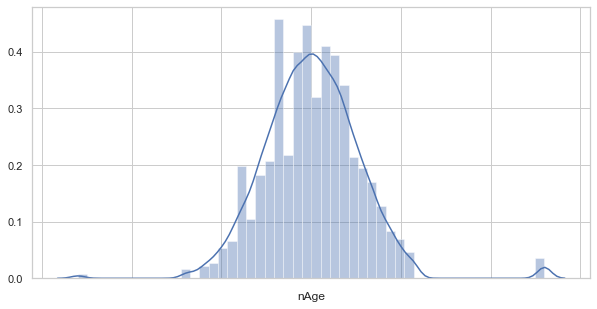

Plot for NINCOME: total counts = 14989


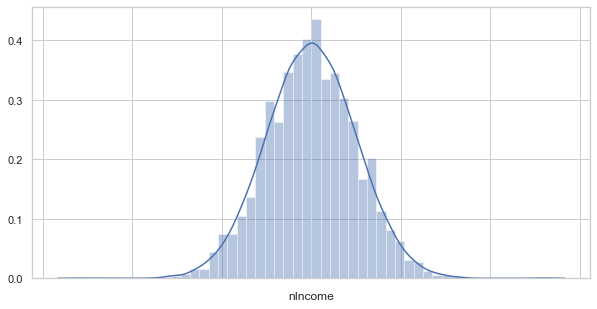

Plot for NAVESPEND: total counts = 14989


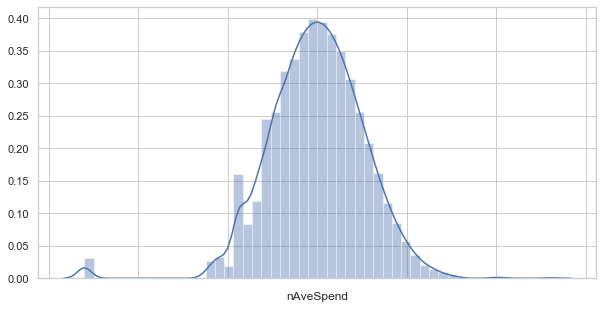

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

df_explore = df[['nAge', 'nIncome', 'nAveSpend']]
for cat in df_explore:
    cat_num = df_explore[cat]
    print("Plot for %s: total counts = %d" % (cat.upper(), len(cat_num)))
    f, ax = plt.subplots(figsize=(10,5))
    plot = sns.distplot(cat_num)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=45)
    plt.show()

Now our numerical variables follow a normal distribution. We will start labeling our data using the most recent touchpoint. Lets see how many possible labels are there in our data.

In [10]:
df['recent_touchpoint'].unique()

array(['mailDiscount', 'mailGift', 'emailDiscount', 'emailDestination',
       'smsDiscount', 'smsDestination', 'emailGift', 'smsGift',
       'mailDestination'], dtype=object)

I assume these are the latest touchpoint each customer went through before making a purchase.

In [11]:
#create a mapping from labels to a unique integer and vice versa for labelling and prediction later
labels = df['recent_touchpoint'].unique()
i = 0
idx2class = {} 
class2idx = {}
for tp in labels:
    idx2class[i] = tp
    class2idx[tp] = i
    i += 1
idx2class

{0: 'mailDiscount',
 1: 'mailGift',
 2: 'emailDiscount',
 3: 'emailDestination',
 4: 'smsDiscount',
 5: 'smsDestination',
 6: 'emailGift',
 7: 'smsGift',
 8: 'mailDestination'}

In [12]:
class2idx

{'mailDiscount': 0,
 'mailGift': 1,
 'emailDiscount': 2,
 'emailDestination': 3,
 'smsDiscount': 4,
 'smsDestination': 5,
 'emailGift': 6,
 'smsGift': 7,
 'mailDestination': 8}

In [13]:
df['label'] = df['recent_touchpoint'].replace(class2idx)

In [59]:
df

,age,marital,segment,SocialMedia,income,creditRating,aveSpend,touchpoints,nTouchpoints,recent_touchpoint,...,D,A,F,E,New,G,nAveSpend,nIncome,nAge,label
0,38,single,P4,U,51000.0,C,5007.50,emailDestination mailDiscount,2,mailDiscount,...,0,0,0,0,0,0,1.798751,-0.406079,0.037646,0
1,39,divorced,P3,U,100000.0,B,19.74,emailDestination mailGift,2,mailGift,...,0,0,0,0,0,0,-0.694311,0.912774,0.123259,1
2,41,married,P4,N,51000.0,D,320.10,emailDiscount mailGift emailDiscount,3,emailDiscount,...,1,0,0,0,0,0,0.559895,-0.406079,0.283522,2
3,60,married,P4,U,152000.0,C,39.47,mailDiscount,1,mailDiscount,...,0,0,0,0,0,0,-0.362850,1.831224,5.199338,0
4,47,married,P2,Y,60000.0,A,19.89,mailDestination emailDestination emailDestination,3,emailDestination,...,0,1,0,0,0,0,-0.687284,-0.106841,0.744694,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14984,32,married,P1,U,33000.0,E,4280.63,emailDestination emailDestination emailDestina...,7,mailDiscount,...,0,0,0,1,0,0,1.748868,-1.340200,-0.659602,0
14985,53,divorced,P3,N,61000.0,F,1332.29,smsDestination mailDiscount emailDestination e...,6,mailDiscount,...,0,0,1,0,0,0,1.280981,-0.051460,1.269664,0
14986,30,single,P4,N,44000.0,C,4010.00,emailDestination emailDestination mailDiscount...,4,mailDiscount,...,0,0,0,0,0,0,1.694923,-0.758004,-0.985610,0
14987,52,married,P4,N,71000.0,C,507.46,emailDestination mailGift emailDiscount smsDes...,8,emailDestination,...,0,0,0,0,0,0,0.779682,0.240671,1.169401,3


Select columns we want to use for our model

In [15]:
df.columns

Index(['age', 'marital', 'segment', 'SocialMedia', 'income', 'creditRating',
       'aveSpend', 'touchpoints', 'nTouchpoints', 'recent_touchpoint',
       'num_creditRating', 'single', 'divorced', 'married', 'unknown', 'P4',
       'P3', 'P2', 'P1', 'U', 'N', 'Y', 'C', 'B', 'D', 'A', 'F', 'E', 'New',
       'G', 'nAveSpend', 'nIncome', 'nAge', 'label'],
      dtype='object')

When a dataset is imbalanced, i.e., the distribution of target variables is not uniform, we should make sure that the training-validation split is stratified. This ensures that the distribution of the target variable is preserved in both the training and validation datasets.

In [16]:
def stratified_split(df, target, val_percent=0.2):
    '''
    Function to split a dataframe into train and validation sets, while preserving the ratio of the labels in the target variable
    Inputs:
    - df, the dataframe
    - target, the target variable
    - val_percent, the percentage of validation samples, default 0.2
    Outputs:
    - train_idxs, the indices of the training dataset
    - val_idxs, the indices of the validation dataset
    '''
    classes=list(df[target].unique())
    train_idxs, val_idxs = [], []
    for c in classes:
        idx=list(df[df[target]==c].index)
        np.random.shuffle(idx)
        val_size=int(len(idx)*val_percent)
        val_idxs+=idx[:val_size]
        train_idxs+=idx[val_size:]
    return train_idxs, val_idxs


train_idxs, val_idxs = stratified_split(df, 'label', val_percent=0.25)

val_idxs, test_idxs = stratified_split(df[df.index.isin(val_idxs)], 'label', val_percent=0.5)

In [17]:
def test_stratified(df, col):
    '''
    Analyzes the ratio of different classes in a categorical variable within a dataframe
    Inputs:
    - dataframe
    - categorical column to be analyzed
    Returns: None
    '''
    classes=list(df[col].unique())
    
    for c in classes:
        print(f'Proportion of records with {c}: {len(df[df[col]==c])*1./len(df):0.2} ({len(df[df[col]==c])} / {len(df)})')

In [18]:
print('---------- STRATIFIED SAMPLING REPORT ----------')
print('-------- Label proportions in FULL data --------')
test_stratified(df, 'label')
print('-------- Label proportions in TRAIN data --------')
test_stratified(df[df.index.isin(train_idxs)], 'label')
print('------ Label proportions in VALIDATION data -----')
test_stratified(df[df.index.isin(val_idxs)], 'label')
print('-------- Label proportions in TEST data ---------')
test_stratified(df[df.index.isin(test_idxs)], 'label')

---------- STRATIFIED SAMPLING REPORT ----------
-------- Label proportions in FULL data --------
Proportion of records with 0: 0.12 (1837 / 14989)
Proportion of records with 1: 0.043 (643 / 14989)
Proportion of records with 2: 0.22 (3229 / 14989)
Proportion of records with 3: 0.37 (5542 / 14989)
Proportion of records with 4: 0.077 (1149 / 14989)
Proportion of records with 5: 0.039 (585 / 14989)
Proportion of records with 6: 0.048 (722 / 14989)
Proportion of records with 7: 0.04 (598 / 14989)
Proportion of records with 8: 0.046 (684 / 14989)
-------- Label proportions in TRAIN data --------
Proportion of records with 0: 0.12 (1378 / 11245)
Proportion of records with 2: 0.22 (2422 / 11245)
Proportion of records with 3: 0.37 (4157 / 11245)
Proportion of records with 5: 0.039 (439 / 11245)
Proportion of records with 6: 0.048 (542 / 11245)
Proportion of records with 7: 0.04 (449 / 11245)
Proportion of records with 8: 0.046 (513 / 11245)
Proportion of records with 4: 0.077 (862 / 11245)
Pro

In [19]:
train_df = df[df.index.isin(train_idxs)]
X_train = train_df[['nTouchpoints', 'single', 'divorced', 'married', 'unknown', 'P4',
       'P3', 'P2', 'P1', 'U', 'N', 'Y', 'C', 'B', 'D', 'A', 'F', 'E', 'New',
       'G', 'nAveSpend', 'nIncome', 'nAge']].values
Y_train = train_df[['label']].values
print('Retrieved Training Data')
val_df = df[df.index.isin(val_idxs)]
X_val = val_df[['nTouchpoints', 'single', 'divorced', 'married', 'unknown', 'P4',
       'P3', 'P2', 'P1', 'U', 'N', 'Y', 'C', 'B', 'D', 'A', 'F', 'E', 'New',
       'G', 'nAveSpend', 'nIncome', 'nAge']].values
Y_val = val_df[['label']].values
print('Retrieved Validation Data')
test_df = df[df.index.isin(test_idxs)]
X_test = test_df[['nTouchpoints', 'single', 'divorced', 'married', 'unknown', 'P4',
       'P3', 'P2', 'P1', 'U', 'N', 'Y', 'C', 'B', 'D', 'A', 'F', 'E', 'New',
       'G', 'nAveSpend', 'nIncome', 'nAge']].values
Y_test = test_df[['label']].values
print('Retrieved Test Data')

Retrieved Training Data
Retrieved Validation Data
Retrieved Test Data


For simplicity, I will explore some basic models as our baseline models and progressively use more complicated models for our prediction task.

Baseline models: Logistic regression(OneVsRest), Multinomial NB, Random Forest, Adaboost, XGBoost

### OneVsRest

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

def train_OVR(X_train, y_train):
    """
      X_train, y_train
      
      return: trained classifier
    """
    
    # Create and fit LogisticRegression wraped into OneVsRestClassifier.
    
    model = OneVsRestClassifier(LogisticRegression(penalty='l2', C=2
                                                   ,max_iter=1000))
    model.fit(X_train, y_train)
    return model
# reshape Y into shape (n_sample,)
ovr = train_OVR(X_train, Y_train.reshape(Y_train.shape[0],))

In [82]:
Y_val_predicted = ovr.predict(X_val)
Y_test_predicted = ovr.predict(X_val)

In [92]:
print(accuracy_score(Y_val, Y_val_predicted))
print(f1_score(Y_val, Y_val_predicted,average='micro'))

print(accuracy_score(Y_test, Y_test_predicted))
print(f1_score(Y_test, Y_test_predicted,average='micro'))

0.39093333333333335
0.39093333333333335
0.4039593365436062
0.4039593365436062


### XGBoost

In [98]:
from xgboost.sklearn import XGBClassifier

xgb1 = XGBClassifier(learning_rate=0.1,
                    n_estimators=1000,
                    max_depth=5,
                    min_child_weight=1,
                    gamma=0,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    objective='multi:softmax',
                    nthread=4,
                    seed=27)

In [99]:
xgb1.fit(X_train, Y_train.reshape(Y_train.shape[0],))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=4, nthread=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=27, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, seed=27, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [100]:
print(accuracy_score(xgb1.predict(X_test), Y_test))
print(f1_score(xgb1.predict(X_test),Y_test,average='micro'))

0.9678972712680578
0.9678972712680578


In [128]:
import xgboost as xgb
import matplotlib.pyplot as plt

train = xgb.DMatrix(X_train, label=Y_train)
val = xgb.DMatrix(X_val, label=Y_val)
store = {}
metrics = ['mlogloss','merror']
param = {
    'learning_rate':0.1,
    'max_depth':5,
    'min_child_weight':1,
    'gamma':0,
    'subsample':0.8,
    'colsample_bytree':0.8,
    'objective':'multi:softmax',
    'num_class':9,
    'nthread':4,
    'seed':27,
    'eval_metric':metrics
    } 
evallist = [(val, 'val'),(train,'train')]
epochs = 1000

In [129]:
model = xgb.train(param, train, epochs, evallist,evals_result=store)

[0]	val-mlogloss:2.07640	val-merror:0.49760	train-mlogloss:2.07277	train-merror:0.49738
[1]	val-mlogloss:1.99286	val-merror:0.48640	train-mlogloss:1.98438	train-merror:0.47932
[2]	val-mlogloss:1.92735	val-merror:0.48373	train-mlogloss:1.91369	train-merror:0.47301
[3]	val-mlogloss:1.86810	val-merror:0.47360	train-mlogloss:1.85228	train-merror:0.46314
[4]	val-mlogloss:1.81499	val-merror:0.46613	train-mlogloss:1.79769	train-merror:0.45896
[5]	val-mlogloss:1.76953	val-merror:0.47360	train-mlogloss:1.75036	train-merror:0.45949
[6]	val-mlogloss:1.72819	val-merror:0.47093	train-mlogloss:1.70676	train-merror:0.45700
[7]	val-mlogloss:1.69495	val-merror:0.46987	train-mlogloss:1.67246	train-merror:0.45860
[8]	val-mlogloss:1.66048	val-merror:0.46933	train-mlogloss:1.63648	train-merror:0.45709
[9]	val-mlogloss:1.63390	val-merror:0.46507	train-mlogloss:1.60852	train-merror:0.45220
[10]	val-mlogloss:1.60431	val-merror:0.46133	train-mlogloss:1.57915	train-merror:0.44864
[11]	val-mlogloss:1.58067	val-m

[93]	val-mlogloss:0.98551	val-merror:0.30347	train-mlogloss:0.86766	train-merror:0.24011
[94]	val-mlogloss:0.98290	val-merror:0.30400	train-mlogloss:0.86452	train-merror:0.23931
[95]	val-mlogloss:0.97834	val-merror:0.30080	train-mlogloss:0.85921	train-merror:0.23780
[96]	val-mlogloss:0.97527	val-merror:0.30133	train-mlogloss:0.85567	train-merror:0.23530
[97]	val-mlogloss:0.97222	val-merror:0.29973	train-mlogloss:0.85220	train-merror:0.23406
[98]	val-mlogloss:0.96737	val-merror:0.29600	train-mlogloss:0.84717	train-merror:0.23095
[99]	val-mlogloss:0.96161	val-merror:0.29120	train-mlogloss:0.84029	train-merror:0.22792
[100]	val-mlogloss:0.95800	val-merror:0.28907	train-mlogloss:0.83657	train-merror:0.22526
[101]	val-mlogloss:0.95541	val-merror:0.28747	train-mlogloss:0.83322	train-merror:0.22357
[102]	val-mlogloss:0.95206	val-merror:0.28587	train-mlogloss:0.82925	train-merror:0.22152
[103]	val-mlogloss:0.94808	val-merror:0.28267	train-mlogloss:0.82482	train-merror:0.21965
[104]	val-mloglos

[185]	val-mlogloss:0.72302	val-merror:0.17387	train-mlogloss:0.56997	train-merror:0.10218
[186]	val-mlogloss:0.72035	val-merror:0.17280	train-mlogloss:0.56706	train-merror:0.10031
[187]	val-mlogloss:0.71722	val-merror:0.17120	train-mlogloss:0.56456	train-merror:0.09942
[188]	val-mlogloss:0.71458	val-merror:0.16907	train-mlogloss:0.56242	train-merror:0.09818
[189]	val-mlogloss:0.71275	val-merror:0.16907	train-mlogloss:0.56011	train-merror:0.09773
[190]	val-mlogloss:0.71089	val-merror:0.16907	train-mlogloss:0.55745	train-merror:0.09702
[191]	val-mlogloss:0.70822	val-merror:0.16640	train-mlogloss:0.55488	train-merror:0.09578
[192]	val-mlogloss:0.70616	val-merror:0.16480	train-mlogloss:0.55297	train-merror:0.09453
[193]	val-mlogloss:0.70385	val-merror:0.16427	train-mlogloss:0.55038	train-merror:0.09329
[194]	val-mlogloss:0.70106	val-merror:0.16213	train-mlogloss:0.54757	train-merror:0.09222
[195]	val-mlogloss:0.69870	val-merror:0.15947	train-mlogloss:0.54495	train-merror:0.09133
[196]	val-

[277]	val-mlogloss:0.55447	val-merror:0.10240	train-mlogloss:0.39708	train-merror:0.04562
[278]	val-mlogloss:0.55327	val-merror:0.10187	train-mlogloss:0.39581	train-merror:0.04509
[279]	val-mlogloss:0.55229	val-merror:0.10133	train-mlogloss:0.39484	train-merror:0.04464
[280]	val-mlogloss:0.55061	val-merror:0.10187	train-mlogloss:0.39321	train-merror:0.04464
[281]	val-mlogloss:0.54880	val-merror:0.10133	train-mlogloss:0.39146	train-merror:0.04402
[282]	val-mlogloss:0.54768	val-merror:0.10080	train-mlogloss:0.39012	train-merror:0.04375
[283]	val-mlogloss:0.54600	val-merror:0.10080	train-mlogloss:0.38844	train-merror:0.04340
[284]	val-mlogloss:0.54436	val-merror:0.10027	train-mlogloss:0.38655	train-merror:0.04322
[285]	val-mlogloss:0.54277	val-merror:0.10133	train-mlogloss:0.38483	train-merror:0.04349
[286]	val-mlogloss:0.54162	val-merror:0.10133	train-mlogloss:0.38370	train-merror:0.04278
[287]	val-mlogloss:0.54019	val-merror:0.10133	train-mlogloss:0.38216	train-merror:0.04206
[288]	val-

[369]	val-mlogloss:0.43863	val-merror:0.06560	train-mlogloss:0.28254	train-merror:0.01983
[370]	val-mlogloss:0.43773	val-merror:0.06507	train-mlogloss:0.28170	train-merror:0.01992
[371]	val-mlogloss:0.43655	val-merror:0.06613	train-mlogloss:0.28053	train-merror:0.01956
[372]	val-mlogloss:0.43524	val-merror:0.06560	train-mlogloss:0.27936	train-merror:0.01956
[373]	val-mlogloss:0.43436	val-merror:0.06507	train-mlogloss:0.27852	train-merror:0.01921
[374]	val-mlogloss:0.43353	val-merror:0.06453	train-mlogloss:0.27768	train-merror:0.01921
[375]	val-mlogloss:0.43264	val-merror:0.06453	train-mlogloss:0.27687	train-merror:0.01930
[376]	val-mlogloss:0.43156	val-merror:0.06453	train-mlogloss:0.27574	train-merror:0.01930
[377]	val-mlogloss:0.43082	val-merror:0.06453	train-mlogloss:0.27505	train-merror:0.01930
[378]	val-mlogloss:0.42975	val-merror:0.06347	train-mlogloss:0.27382	train-merror:0.01903
[379]	val-mlogloss:0.42861	val-merror:0.06293	train-mlogloss:0.27287	train-merror:0.01903
[380]	val-

[461]	val-mlogloss:0.35929	val-merror:0.05440	train-mlogloss:0.20775	train-merror:0.01076
[462]	val-mlogloss:0.35850	val-merror:0.05493	train-mlogloss:0.20684	train-merror:0.01085
[463]	val-mlogloss:0.35797	val-merror:0.05493	train-mlogloss:0.20625	train-merror:0.01094
[464]	val-mlogloss:0.35722	val-merror:0.05440	train-mlogloss:0.20555	train-merror:0.01094
[465]	val-mlogloss:0.35663	val-merror:0.05387	train-mlogloss:0.20497	train-merror:0.01094
[466]	val-mlogloss:0.35598	val-merror:0.05280	train-mlogloss:0.20423	train-merror:0.01067
[467]	val-mlogloss:0.35534	val-merror:0.05280	train-mlogloss:0.20356	train-merror:0.01058
[468]	val-mlogloss:0.35454	val-merror:0.05333	train-mlogloss:0.20294	train-merror:0.01058
[469]	val-mlogloss:0.35381	val-merror:0.05387	train-mlogloss:0.20230	train-merror:0.01049
[470]	val-mlogloss:0.35300	val-merror:0.05280	train-mlogloss:0.20161	train-merror:0.01040
[471]	val-mlogloss:0.35224	val-merror:0.05280	train-mlogloss:0.20099	train-merror:0.01049
[472]	val-

[553]	val-mlogloss:0.30094	val-merror:0.04373	train-mlogloss:0.15457	train-merror:0.00543
[554]	val-mlogloss:0.30023	val-merror:0.04267	train-mlogloss:0.15399	train-merror:0.00525
[555]	val-mlogloss:0.29979	val-merror:0.04373	train-mlogloss:0.15363	train-merror:0.00507
[556]	val-mlogloss:0.29925	val-merror:0.04373	train-mlogloss:0.15316	train-merror:0.00507
[557]	val-mlogloss:0.29902	val-merror:0.04373	train-mlogloss:0.15289	train-merror:0.00507
[558]	val-mlogloss:0.29852	val-merror:0.04427	train-mlogloss:0.15245	train-merror:0.00498
[559]	val-mlogloss:0.29806	val-merror:0.04373	train-mlogloss:0.15201	train-merror:0.00489
[560]	val-mlogloss:0.29765	val-merror:0.04373	train-mlogloss:0.15155	train-merror:0.00480
[561]	val-mlogloss:0.29683	val-merror:0.04267	train-mlogloss:0.15091	train-merror:0.00471
[562]	val-mlogloss:0.29640	val-merror:0.04160	train-mlogloss:0.15056	train-merror:0.00471
[563]	val-mlogloss:0.29568	val-merror:0.04160	train-mlogloss:0.14997	train-merror:0.00471
[564]	val-

[645]	val-mlogloss:0.25965	val-merror:0.03467	train-mlogloss:0.11825	train-merror:0.00187
[646]	val-mlogloss:0.25927	val-merror:0.03467	train-mlogloss:0.11788	train-merror:0.00187
[647]	val-mlogloss:0.25875	val-merror:0.03467	train-mlogloss:0.11751	train-merror:0.00187
[648]	val-mlogloss:0.25839	val-merror:0.03467	train-mlogloss:0.11720	train-merror:0.00187
[649]	val-mlogloss:0.25816	val-merror:0.03467	train-mlogloss:0.11682	train-merror:0.00187
[650]	val-mlogloss:0.25775	val-merror:0.03467	train-mlogloss:0.11650	train-merror:0.00187
[651]	val-mlogloss:0.25736	val-merror:0.03467	train-mlogloss:0.11617	train-merror:0.00187
[652]	val-mlogloss:0.25708	val-merror:0.03413	train-mlogloss:0.11588	train-merror:0.00187
[653]	val-mlogloss:0.25683	val-merror:0.03413	train-mlogloss:0.11565	train-merror:0.00187
[654]	val-mlogloss:0.25638	val-merror:0.03413	train-mlogloss:0.11528	train-merror:0.00178
[655]	val-mlogloss:0.25609	val-merror:0.03413	train-mlogloss:0.11507	train-merror:0.00169
[656]	val-

[737]	val-mlogloss:0.22800	val-merror:0.03200	train-mlogloss:0.09194	train-merror:0.00089
[738]	val-mlogloss:0.22772	val-merror:0.03200	train-mlogloss:0.09164	train-merror:0.00089
[739]	val-mlogloss:0.22762	val-merror:0.03200	train-mlogloss:0.09144	train-merror:0.00089
[740]	val-mlogloss:0.22731	val-merror:0.03147	train-mlogloss:0.09119	train-merror:0.00089
[741]	val-mlogloss:0.22717	val-merror:0.03093	train-mlogloss:0.09100	train-merror:0.00089
[742]	val-mlogloss:0.22675	val-merror:0.03093	train-mlogloss:0.09073	train-merror:0.00089
[743]	val-mlogloss:0.22638	val-merror:0.03093	train-mlogloss:0.09047	train-merror:0.00089
[744]	val-mlogloss:0.22604	val-merror:0.03147	train-mlogloss:0.09022	train-merror:0.00089
[745]	val-mlogloss:0.22575	val-merror:0.03147	train-mlogloss:0.08997	train-merror:0.00089
[746]	val-mlogloss:0.22550	val-merror:0.03147	train-mlogloss:0.08974	train-merror:0.00089
[747]	val-mlogloss:0.22516	val-merror:0.03200	train-mlogloss:0.08947	train-merror:0.00098
[748]	val-

[829]	val-mlogloss:0.20474	val-merror:0.02880	train-mlogloss:0.07279	train-merror:0.00044
[830]	val-mlogloss:0.20451	val-merror:0.02880	train-mlogloss:0.07262	train-merror:0.00044
[831]	val-mlogloss:0.20430	val-merror:0.02933	train-mlogloss:0.07245	train-merror:0.00044
[832]	val-mlogloss:0.20415	val-merror:0.02987	train-mlogloss:0.07227	train-merror:0.00044
[833]	val-mlogloss:0.20409	val-merror:0.02933	train-mlogloss:0.07209	train-merror:0.00036
[834]	val-mlogloss:0.20385	val-merror:0.02933	train-mlogloss:0.07192	train-merror:0.00036
[835]	val-mlogloss:0.20363	val-merror:0.02933	train-mlogloss:0.07173	train-merror:0.00018
[836]	val-mlogloss:0.20339	val-merror:0.02933	train-mlogloss:0.07160	train-merror:0.00018
[837]	val-mlogloss:0.20321	val-merror:0.02933	train-mlogloss:0.07144	train-merror:0.00018
[838]	val-mlogloss:0.20301	val-merror:0.02880	train-mlogloss:0.07126	train-merror:0.00018
[839]	val-mlogloss:0.20277	val-merror:0.02933	train-mlogloss:0.07107	train-merror:0.00018
[840]	val-

[921]	val-mlogloss:0.18825	val-merror:0.02667	train-mlogloss:0.05918	train-merror:0.00009
[922]	val-mlogloss:0.18804	val-merror:0.02667	train-mlogloss:0.05906	train-merror:0.00009
[923]	val-mlogloss:0.18783	val-merror:0.02667	train-mlogloss:0.05890	train-merror:0.00009
[924]	val-mlogloss:0.18762	val-merror:0.02667	train-mlogloss:0.05875	train-merror:0.00009
[925]	val-mlogloss:0.18748	val-merror:0.02667	train-mlogloss:0.05865	train-merror:0.00009
[926]	val-mlogloss:0.18720	val-merror:0.02667	train-mlogloss:0.05851	train-merror:0.00009
[927]	val-mlogloss:0.18701	val-merror:0.02667	train-mlogloss:0.05840	train-merror:0.00009
[928]	val-mlogloss:0.18675	val-merror:0.02667	train-mlogloss:0.05822	train-merror:0.00009
[929]	val-mlogloss:0.18659	val-merror:0.02613	train-mlogloss:0.05810	train-merror:0.00009
[930]	val-mlogloss:0.18643	val-merror:0.02613	train-mlogloss:0.05796	train-merror:0.00009
[931]	val-mlogloss:0.18628	val-merror:0.02667	train-mlogloss:0.05779	train-merror:0.00009
[932]	val-

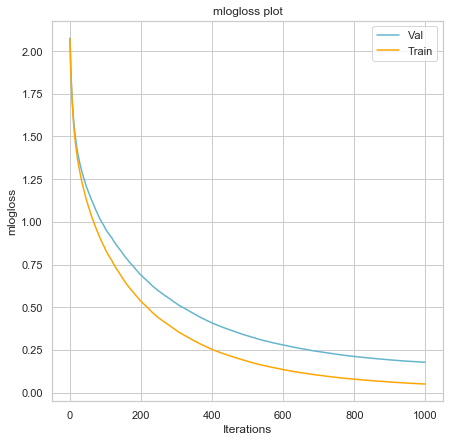

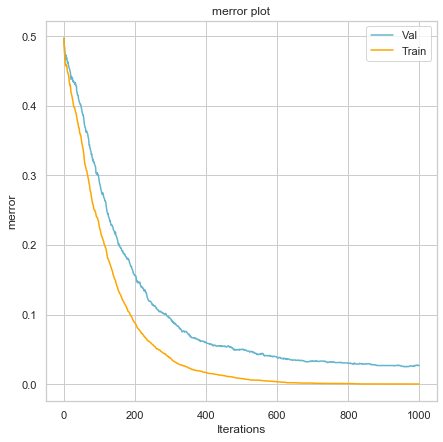

In [130]:
def plot_compare(metrics,eval_results,epochs):
    for m in metrics:
        test_score = eval_results['val'][m]
        train_score = eval_results['train'][m]
        rang = range(0, epochs)
        plt.plot(rang, test_score,"c", label="Val")
        plt.plot(rang, train_score,"orange", label="Train")
        title_name = m + " plot"
        plt.title(title_name)
        plt.xlabel('Iterations')
        plt.ylabel(m)
        lgd = plt.legend()
        plt.show()
        
plt.rcParams["figure.figsize"] = [7,7]
plot_compare(metrics,store,epochs)

### Random Forest